In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [292]:
nhl = pd.read_csv("NHL.csv", encoding='latin1')
nhl = nhl[nhl['Season'] == 2017]
# Let's cluster forwards
nhl = nhl[nhl['Pos'] != 'D']
nhl = nhl[nhl['GP'] > 20]
nhl = nhl.drop(['Rk', 'Age', 'Season', 'Votes', 'HART'],axis=1)

In [293]:
float_cols = nhl.select_dtypes(include=['float']).columns.tolist()
int_cols = nhl.select_dtypes(include=['int']).columns.tolist()
text_cols = nhl.select_dtypes(include=['object']).columns.tolist()
print(float_cols)
print('***')
print(int_cols)
print('***')
print(text_cols)

['PS', 'S_percent', 'ATOI', 'FO_percent']
***
['GP', 'G', 'A', 'PTS', 'plusminus', 'PIM', 'EV', 'PP', 'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'TOI', 'BLK', 'HIT', 'FOW', 'FOL']
***
['Player', 'Pos', 'Tm']


In [294]:
## For a quick test, let's use all int columns as features
features = []
for col in int_cols:
    col_name = col + '_GP'
    nhl[col_name] = nhl[col]/nhl['GP']
    features.append(col_name)
nhl.head()

,Player,Pos,Tm,GP,G,A,PTS,plusminus,PIM,PS,...,GW_GP,EV.1_GP,PP.1_GP,SH.1_GP,S_GP,TOI_GP,BLK_GP,HIT_GP,FOW_GP,FOL_GP
0,Connor McDavid\mcdavco01,C,EDM,82,30,70,100,27,26,12.8,...,0.073171,0.548780,0.292683,0.012195,3.060976,21.134146,0.353659,0.414634,4.243902,5.585366
1,Sidney Crosby\crosbsi01,C,PIT,75,44,45,89,17,24,12.3,...,0.066667,0.453333,0.146667,0.000000,3.400000,19.880000,0.360000,1.066667,11.226667,12.080000
2,Patrick Kane\kanepa01,RW,CHI,82,34,55,89,11,32,10.8,...,0.060976,0.475610,0.195122,0.000000,3.560976,21.390244,0.182927,0.341463,0.085366,0.536585
3,Nicklas Backstrom\backsni02,C,WSH,82,23,63,86,17,38,9.9,...,0.060976,0.439024,0.329268,0.000000,1.975610,18.256098,0.402439,0.548780,8.353659,7.902439
4,Nikita Kucherov\kucheni01,RW,TBL,74,40,45,85,13,38,12.0,...,0.094595,0.405405,0.202703,0.000000,3.324324,19.432432,0.270270,0.405405,0.000000,0.000000


In [399]:
cols = ['A','G', 'S', 'PIM', 'HIT']
features = []
for col in cols:
    col_name = col + '_TOI'
    nhl[col_name] = nhl[col]/nhl['GP']
    features.append(col_name)
nhl.head()

,Player,Pos,Tm,GP,G,A,PTS,plusminus,PIM,PS,...,A_TOI,PIM_TOI,cluster,HIT_TOI,PTS_TOI,S_TOI,TOI_TOI,PP_TOI,BLK_TOI,GW_TOI
0,Connor McDavid\mcdavco01,C,EDM,82,30,70,100,27,26,12.8,...,0.853659,0.317073,0,0.414634,1.219512,3.060976,21.134146,0.036585,0.353659,0.073171
1,Sidney Crosby\crosbsi01,C,PIT,75,44,45,89,17,24,12.3,...,0.600000,0.320000,0,1.066667,1.186667,3.400000,19.880000,0.186667,0.360000,0.066667
2,Patrick Kane\kanepa01,RW,CHI,82,34,55,89,11,32,10.8,...,0.670732,0.390244,0,0.341463,1.085366,3.560976,21.390244,0.085366,0.182927,0.060976
3,Nicklas Backstrom\backsni02,C,WSH,82,23,63,86,17,38,9.9,...,0.768293,0.463415,0,0.548780,1.048780,1.975610,18.256098,0.097561,0.402439,0.060976
4,Nikita Kucherov\kucheni01,RW,TBL,74,40,45,85,13,38,12.0,...,0.608108,0.513514,0,0.405405,1.148649,3.324324,19.432432,0.229730,0.270270,0.094595


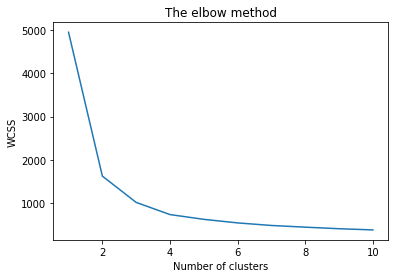

In [400]:
features.append('ATOI')
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(nhl[features])
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [401]:
print(features)

['A_TOI', 'G_TOI', 'S_TOI', 'PIM_TOI', 'HIT_TOI', 'ATOI']


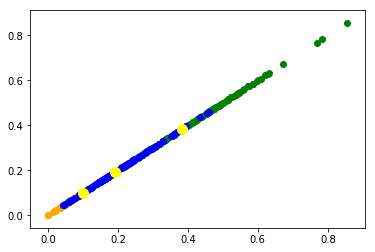

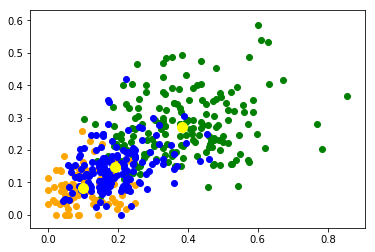

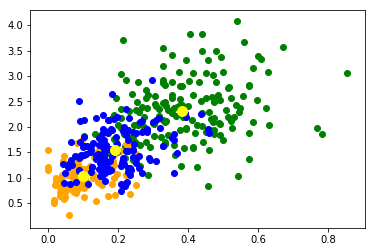

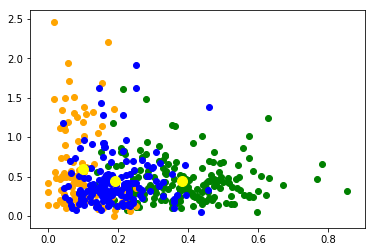

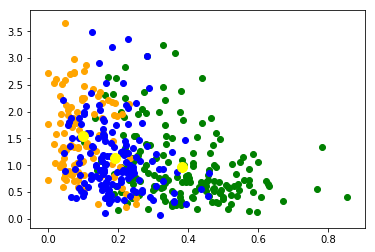

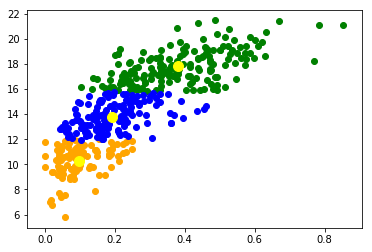

In [408]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit_predict(nhl[features])
cluster_0['cluster'] = kmeans.labels_

colors = ['orange', 'blue', 'green',]

for i in range(len(features)):
    for n in range(num_clusters):
        clustered_df = cluster_0[cluster_0['cluster'] == n]
        plt.scatter(clustered_df[features[0]], clustered_df[features[i]], c=colors[n-1])
    #Plotting the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,i], s = 100, c = 'yellow', label = 'Centroids')
    plt.show()

In [403]:
cluster_0 = nhl[nhl['cluster'] == 0]
cluster_1 = nhl[nhl['cluster'] == 1]
cluster_2= nhl[nhl['cluster'] == 2]
cluster_3 = nhl[nhl['cluster'] == 3]

In [404]:
cluster_0.describe(include='all')

,Player,Pos,Tm,GP,G,A,PTS,plusminus,PIM,PS,...,A_TOI,PIM_TOI,cluster,HIT_TOI,PTS_TOI,S_TOI,TOI_TOI,PP_TOI,BLK_TOI,GW_TOI
count,178,178,178,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.0,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
unique,178,3,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Brandon Saad\saadbr01,C,TOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,89,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,74.814607,20.432584,28.724719,49.157303,0.348315,33.426966,5.532022,...,0.382114,0.449344,0.0,0.964366,0.654396,2.299988,17.802099,0.069521,0.486211,0.047892
std,NaN,NaN,NaN,10.288187,7.817730,11.184006,15.679991,12.456570,20.268752,2.432812,...,0.134417,0.263897,0.0,0.664126,0.184382,0.613054,1.339114,0.045158,0.211866,0.028227
min,NaN,NaN,NaN,21.000000,3.000000,5.000000,10.000000,-34.000000,4.000000,-0.500000,...,0.102564,0.055556,0.0,0.125000,0.200000,0.826087,15.841463,0.000000,0.048780,0.000000
25%,NaN,NaN,NaN,72.000000,15.000000,20.000000,38.000000,-8.000000,20.000000,4.000000,...,0.276017,0.268293,0.0,0.515244,0.520338,1.868902,16.774390,0.037037,0.353659,0.026404
50%,NaN,NaN,NaN,79.000000,19.000000,28.500000,50.000000,1.000000,30.000000,5.500000,...,0.378049,0.390244,0.0,0.731707,0.656429,2.253165,17.619542,0.062500,0.450352,0.048780
75%,NaN,NaN,NaN,82.000000,25.000000,36.000000,58.000000,10.000000,39.750000,6.875000,...,0.473684,0.569876,0.0,1.221545,0.755345,2.624238,18.674359,0.097110,0.610231,0.063291


In [405]:
cluster_1.describe(include='all')

,Player,Pos,Tm,GP,G,A,PTS,plusminus,PIM,PS,...,A_TOI,PIM_TOI,cluster,HIT_TOI,PTS_TOI,S_TOI,TOI_TOI,PP_TOI,BLK_TOI,GW_TOI
count,101,101,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,101,5,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Curtis McKenzie\mckencu01,C,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,35,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,49.356436,4.247525,4.851485,9.099010,-2.188119,31.188119,0.538614,...,0.098944,0.594595,1.0,1.538057,0.181755,1.024963,10.302130,0.006098,0.413146,0.012703
std,NaN,NaN,NaN,17.096540,3.421713,3.491092,6.000842,7.086202,31.283131,0.937227,...,0.062411,0.515836,0.0,0.728361,0.087199,0.294667,1.264183,0.022407,0.197205,0.017544
min,NaN,NaN,NaN,21.000000,0.000000,0.000000,1.000000,-21.000000,0.000000,-1.000000,...,0.000000,0.000000,1.0,0.222222,0.021739,0.254902,5.823529,0.000000,0.038462,0.000000
25%,NaN,NaN,NaN,36.000000,2.000000,2.000000,4.000000,-6.000000,10.000000,-0.100000,...,0.050000,0.206897,1.0,0.966102,0.115385,0.840000,9.709091,0.000000,0.274510,0.000000
50%,NaN,NaN,NaN,51.000000,4.000000,4.000000,8.000000,-2.000000,20.000000,0.400000,...,0.085366,0.423077,1.0,1.406250,0.166667,1.000000,10.650000,0.000000,0.390625,0.000000
75%,NaN,NaN,NaN,62.000000,6.000000,7.000000,12.000000,2.000000,40.000000,0.900000,...,0.142857,0.743590,1.0,2.128205,0.236842,1.227273,11.157895,0.000000,0.512821,0.023810


In [406]:
cluster_2.describe(include='all')

,Player,Pos,Tm,GP,G,A,PTS,plusminus,PIM,PS,...,A_TOI,PIM_TOI,cluster,HIT_TOI,PTS_TOI,S_TOI,TOI_TOI,PP_TOI,BLK_TOI,GW_TOI
count,154,154,154,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
unique,154,5,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Timo Meier\meierti01,LW,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,57,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,65.051948,9.805195,12.727273,22.532468,-1.110390,29.564935,2.055195,...,0.192004,0.445114,2.0,1.131983,0.339929,1.550332,13.746311,0.020369,0.444384,0.023390
std,NaN,NaN,NaN,15.700544,5.437798,6.771985,10.786804,10.354224,23.621726,1.647142,...,0.084112,0.320336,0.0,0.665930,0.124880,0.406223,1.053984,0.028439,0.194299,0.020478
min,NaN,NaN,NaN,21.000000,0.000000,1.000000,2.000000,-30.000000,4.000000,-1.200000,...,0.043478,0.051282,2.0,0.072464,0.086957,0.728395,11.923077,0.000000,0.051724,0.000000
25%,NaN,NaN,NaN,57.000000,6.000000,8.000000,15.000000,-7.000000,14.000000,1.000000,...,0.143601,0.244151,2.0,0.626913,0.256963,1.236271,12.902244,0.000000,0.314662,0.000000
50%,NaN,NaN,NaN,68.500000,9.000000,12.000000,21.500000,-1.000000,22.000000,1.800000,...,0.173623,0.354247,2.0,0.955717,0.320216,1.507324,13.634539,0.012346,0.412358,0.020204
75%,NaN,NaN,NaN,78.000000,13.000000,17.000000,28.000000,5.750000,38.000000,2.775000,...,0.233708,0.527656,2.0,1.467706,0.408931,1.866013,14.649375,0.031622,0.530679,0.036530


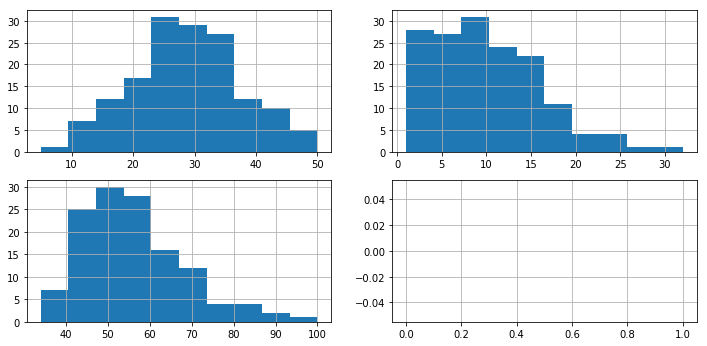

In [383]:
# Creates size 5 by 12 inches blank canvas
fig = plt.figure(figsize=(12,12))

# Create a 4 blank charts that will go in the canvas
# (Row, Column, Index)
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)

#Pandas dataframe to histogram for each axis.
cluster_0['PTS'].hist(ax=ax1)
cluster_1['PTS'].hist(ax=ax2)
cluster_2['PTS'].hist(ax=ax3)
cluster_3['PTS'].hist(ax=ax4)
plt.show()

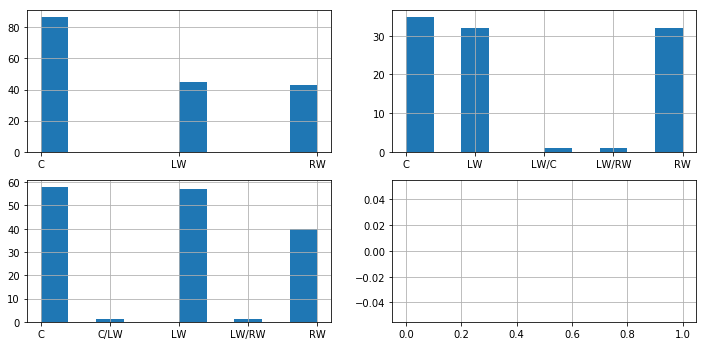

In [342]:
# Creates size 5 by 12 inches blank canvas
fig = plt.figure(figsize=(12,12))

# Create a 4 blank charts that will go in the canvas
# (Row, Column, Index)
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)

#Pandas dataframe to histogram for each axis.
cluster_0['Pos'].hist(ax=ax1)
cluster_1['Pos'].hist(ax=ax2)
cluster_2['Pos'].hist(ax=ax3)
cluster_3['Pos'].hist(ax=ax4)
plt.show()

In [148]:
cluster_2.sort_values('PTS', ascending=False).head()

,Player,Pos,Tm,GP,G,A,PTS,plusminus,PIM,PS,...,EV.1_GP,PP.1_GP,SH.1_GP,S_GP,TOI_GP,BLK_GP,HIT_GP,FOW_GP,FOL_GP,cluster
2,Patrick Kane\kanepa01,RW,CHI,82,34,55,89,11,32,10.8,...,0.475610,0.195122,0.000,3.560976,21.390244,0.182927,0.341463,0.085366,0.536585,2
5,Brad Marchand\marchbr03,LW,BOS,80,39,46,85,18,81,12.6,...,0.362500,0.187500,0.025,2.825000,19.437500,0.437500,0.637500,0.162500,0.287500,2
4,Nikita Kucherov\kucheni01,RW,TBL,74,40,45,85,13,38,12.0,...,0.405405,0.202703,0.000,3.324324,19.432432,0.270270,0.405405,0.000000,0.000000,2
9,Vladimir Tarasenko\tarasvl01,RW,STL,82,39,36,75,-1,12,10.2,...,0.280488,0.158537,0.000,3.487805,18.475610,0.378049,0.609756,0.060976,0.060976,2
10,Artemi Panarin\panarar01,LW,CHI,82,31,43,74,18,21,9.4,...,0.426829,0.097561,0.000,2.573171,19.475610,0.170732,0.280488,0.024390,0.097561,2


In [128]:
cluster_1.sort_values('PTS', ascending=False).head()

,Player,Pos,Tm,GP,G,A,PTS,plusminus,PIM,PS,...,EV.1_GP,PP.1_GP,SH.1_GP,S_GP,TOI_GP,BLK_GP,HIT_GP,FOW_GP,FOL_GP,cluster
2,Patrick Kane\kanepa01,RW,CHI,82,34,55,89,11,32,10.8,...,0.475610,0.195122,0.000000,3.560976,21.390244,0.182927,0.341463,0.085366,0.536585,1
5,Brad Marchand\marchbr03,LW,BOS,80,39,46,85,18,81,12.6,...,0.362500,0.187500,0.025000,2.825000,19.437500,0.437500,0.637500,0.162500,0.287500,1
4,Nikita Kucherov\kucheni01,RW,TBL,74,40,45,85,13,38,12.0,...,0.405405,0.202703,0.000000,3.324324,19.432432,0.270270,0.405405,0.000000,0.000000,1
9,Vladimir Tarasenko\tarasvl01,RW,STL,82,39,36,75,-1,12,10.2,...,0.280488,0.158537,0.000000,3.487805,18.475610,0.378049,0.609756,0.060976,0.060976,1
11,Blake Wheeler\wheelbl01,RW,WPG,82,26,48,74,6,47,8.2,...,0.378049,0.195122,0.012195,3.158537,20.146341,0.621951,1.219512,0.524390,0.621951,1


In [129]:
cluster_0.sort_values('PTS', ascending=False).head()

,Player,Pos,Tm,GP,G,A,PTS,plusminus,PIM,PS,...,EV.1_GP,PP.1_GP,SH.1_GP,S_GP,TOI_GP,BLK_GP,HIT_GP,FOW_GP,FOL_GP,cluster
0,Connor McDavid\mcdavco01,C,EDM,82,30,70,100,27,26,12.8,...,0.548780,0.292683,0.012195,3.060976,21.134146,0.353659,0.414634,4.243902,5.585366,0
1,Sidney Crosby\crosbsi01,C,PIT,75,44,45,89,17,24,12.3,...,0.453333,0.146667,0.000000,3.400000,19.880000,0.360000,1.066667,11.226667,12.080000,0
3,Nicklas Backstrom\backsni02,C,WSH,82,23,63,86,17,38,9.9,...,0.439024,0.329268,0.000000,1.975610,18.256098,0.402439,0.548780,8.353659,7.902439,0
6,Mark Scheifele\scheima01,C,WPG,79,32,50,82,18,38,10.3,...,0.506329,0.101266,0.025316,2.025316,20.556962,0.430380,0.620253,8.037975,10.455696,0
7,Leon Draisaitl\draisle01,C,EDM,82,29,48,77,7,20,9.6,...,0.378049,0.207317,0.000000,2.097561,18.878049,0.439024,0.500000,5.804878,6.048780,0
